# Problem Set 1: Bayesian Decision Theory

## Introduction
The MNIST database (Modified National Institute of Standards and Technology Database) is a large collection of handwritten digits which happens to be a state of the art data set to train and test machine learning models using image processing.It consist of 60000 Training samples and 10000 Testing Samples. Each sample image consist of normalized $28X28$ pixels grayscale image stored as 784 dimensional vector for each sample.This is a way of dimension reduction done by the MNIST to use it for model developments.

### Preparing the datasets
For loading the given MNIST datasets we will be using the mnist library to fetch the data.The MNIST() function will be used to fetch the datasets from the directory './data'.

In [1]:
import numpy as np
import cv2
from mnist.loader import MNIST
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

m = MNIST('./data')

Now we load the different datasets as the X-Training and Y-Training set which has 60000 samples which will be used to train the classification model and then the X-Test and Y-test data set which has 10000 samples will be used to test the model. After seperating the datasets , the data sets will be converted to ND array and as float values which will be benificial for the computations.

In [2]:
xtrain,ytrain = m.load_training()
xtest,ytest = m.load_testing()
xtrain = np.asarray(xtrain).astype(np.float32)
ytrain = np.asarray(ytrain).astype(np.float32)
xtest = np.asarray(xtest).astype(np.float32)
ytest = np.asarray(ytest).astype(np.float32)


### Part 1 : Finding the Mean and Standard Deviation of the datasets
First we have to divide the given images which is in form of vector of dimension 784 back to matrix image of dimension $28X28$ and save it in a seperate list consisting of 60000 matrices.After that group them seperately from 0 to 9 using the y-training sets.

In [3]:
xmat_list = []   #list that holds 60000 matrices
for i in range(0,ytrain.shape[0]):
    x = np.array(xtrain[i])
    matrix = np.reshape(x,(28,28))
    xmat_list.append(matrix)
l0=[]
l1=[]
l2=[]
l3=[]
l4=[]
l5=[]
l6=[]
l7=[]
l8=[]
l9=[]
cat_list = [l0,l1,l2,l3,l4,l5,l6,l7,l8,l9] 
#it is the list of 10 which holds its respective category matrices within it as lists

for i in range(0,60000):
    yv = int(ytrain[i])
    cat_list[yv].append(xmat_list[i])    

The the 60000 matrices has been seperated to its respective categories. Now the mean and standard deviation can be computed element wise over all the categories to obtain a Mean Image matrix and Standard Deviation Image Matrix. We will define two functions to find the matrix mean and Standard Deviation.

\begin{equation}
Mean
\\
\mu = \frac{\sum x_i}{N}
\end{equation}
\
\begin{equation}
Standard Deviation
\\
\sigma = \sqrt{\frac{\sum(x_i - \mu)^2}{N}}
\end{equation}


In [4]:
def matrix_mean(L):
    sum = np.zeros((28,28))
    for i in range(0,len(L)):
        sum = sum + L[i]
    mean = sum/len(L)
    return mean
def matrix_sd(L,mean):
    n = len(L)
    sumd = np.zeros((28,28))
    for i in range(0,n):
        sumd = sumd + (L[i]-mean)**2
    sd = sumd/n
    sd = np.sqrt(sd)
    return sd


Each list of matrices present in the 10 categories will be passed through both these functions to compute the Mean and Standard Deviation matrices. Then the matrix image cab be ploted.

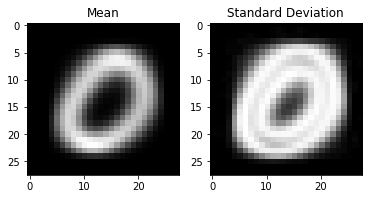

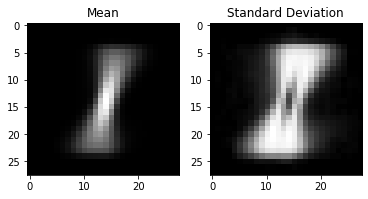

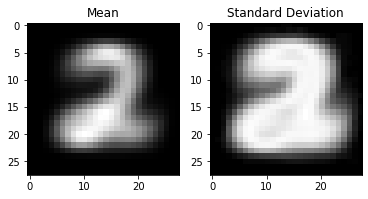

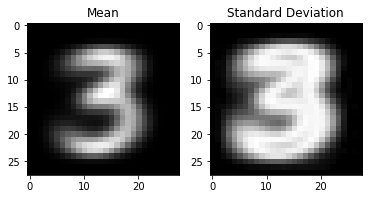

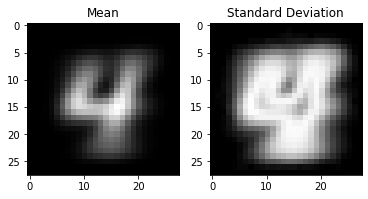

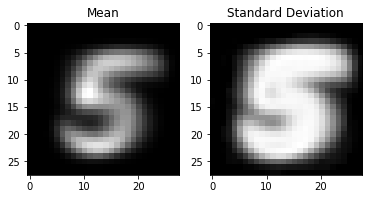

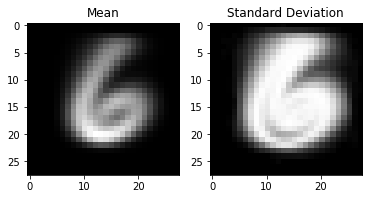

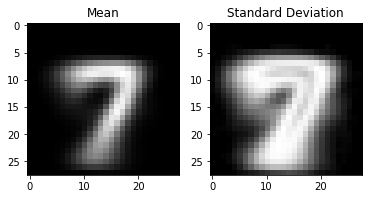

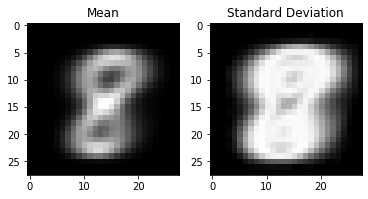

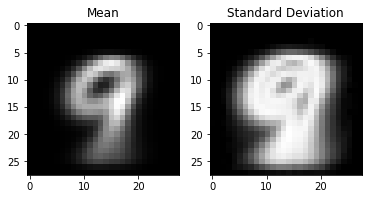

In [5]:

mean_list = []
sd_list = []
for i in range(0,10):
    mean = matrix_mean(cat_list[i])
    sd = matrix_sd(cat_list[i],mean)
    mean_list.append(mean)
    sd_list.append(sd)

for i in range(0,10):
    fig = plt.figure()
    a = fig.add_subplot(1, 2, 1)
    imgplot = plt.imshow(mean_list[i],cmap='gray')
    a.set_title('Mean')
    a = fig.add_subplot(1, 2, 2)
    imgplot = plt.imshow(sd_list[i],cmap='gray')
    a.set_title('Standard Deviation')

### Part 2 : Classifying the Testing data set 
We will be using Linear Discriminant Analysis (LDA) to build our classifier. The LDA is a classifier with linear decision boundary which is accuired by fitting the class conditional probablities and bayesian decision theory to it.We will fit in a decision boundary from the given training data and following it find the zero-one classification loss. After that we will use the Baye's Rull to predict the values. 
\begin{equation}
Bayes Rule
\\
p(A|B) = \frac{p(B|A)P(A)}{P(B)}
\\
P(B) = \sum P(B|A)P(A)
\end{equation}


(784,)


In [8]:

true = 0
error = 0
for i in range(0,ytest.shape[0]):
    error = error + ((ytest[i]-ypred[i])**2)**0.5
    if(ytest[i] == ypred[i]):
        true = true+1
        
accuracy = true/ypred.shape[0]
Error = error/ypred.shape[0] 

print('Accuracy - ',accuracy*100,'%')
print('Error - ',Error*100,'%')



Accuracy -  87.3 %
Error -  45.39 %
